In [31]:
#load the necessary modules
import pandas as pd
import numpy as np
from scipy.io import loadmat
import os

# Step 1 - Load The Data

In [32]:
#load your own path here where the datasets reside
# path = '/home/brett/Documents/Datasets/ten-datasets/'
path = '../ten-datasets/'

#load the dataset into a dataframe
polishdata = loadmat(path + 'Polish.mat')

In [33]:
#only looking at a single year at this stage. Not sure whether they is need to join up multiple years or not.
df = pd.DataFrame(polishdata['year5'])

In [34]:
df.to_csv('test.csv')

In [35]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,64
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.080955,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0.0
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.028591,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,0.0
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.123960,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,0.0
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,0.418840,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,0.0
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.240400,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,0.0


Note, the following creates an 80/20 train/test split but this could be done more easily using sklearn functions which I'll look at.

In [36]:
#add a random number column so that we can split the data
df['random_sample'] = np.random.rand(1,len(df)).T 

In [37]:
print(df.shape)
df.head()


(5910, 66)


,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,random_sample
0,0.088238,0.55472,0.01134,1.0205,-66.5200,0.342040,0.109490,0.57752,1.0881,0.32036,...,0.275430,0.91905,0.002024,7.2711,4.7343,142.760,2.5568,3.2597,0.0,0.214712
1,-0.006202,0.48465,0.23298,1.5998,6.1825,0.000000,-0.006202,1.06340,1.2757,0.51535,...,-0.012035,1.00470,0.152220,6.0911,3.2749,111.140,3.2841,3.3700,0.0,0.792667
2,0.130240,0.22142,0.57751,3.6082,120.0400,0.187640,0.162120,3.05900,1.1415,0.67731,...,0.192290,0.87604,0.000000,8.7934,2.9870,71.531,5.1027,5.6188,0.0,0.313965
3,-0.089951,0.88700,0.26927,1.5222,-55.9920,-0.073957,-0.089951,0.12740,1.2754,0.11300,...,-0.796020,0.59074,2.878700,7.6524,3.3302,147.560,2.4735,5.9299,0.0,0.337065
4,0.048179,0.55041,0.10765,1.2437,-22.9590,0.000000,0.059280,0.81682,1.5150,0.44959,...,0.107160,0.77048,0.139380,10.1180,4.0950,106.430,3.4294,3.3622,0.0,0.405731


In [38]:
#column 64 is the classification column indicating whether firm went bunkrupt or not. If the random number is less
#0.8 then its in the training set
y_train = df[64][df['random_sample'] <=.8]

In [39]:
#if the random number is greater than 0.8, then it is in the test set
y_test = df[64][df['random_sample'] >.8]

In [40]:
x_train = df.iloc[:,0:64][df['random_sample'] <=.8]

In [41]:
x_test = df.iloc[:,0:64][df['random_sample'] >.8]

In [42]:
x_test.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
5,0.231560,0.51047,0.47291,1.9393,15.1020,0.00000,0.287690,0.95899,1.7915,0.48953,...,7008.80,0.184030,0.47303,0.83996,0.014242,4.6071,4.9220,102.580,3.5581,75.941
6,0.099486,0.59991,0.37489,1.6529,19.0360,0.21084,0.123950,0.66690,1.0972,0.40009,...,6131.00,0.088581,0.24866,0.91142,0.064344,5.4655,2.4784,130.020,2.8072,31.645
17,0.130330,0.77424,0.21070,1.2721,7.3584,0.00000,0.164870,0.29159,2.7657,0.22576,...,575.75,0.079606,0.57728,0.94055,0.000000,17.6060,3.5932,102.180,3.5721,183.640
22,0.072197,0.79244,0.28691,1.4024,35.0650,0.00000,0.093762,0.26193,2.2096,0.20756,...,126.34,0.072076,0.34783,0.95757,0.121840,26.7060,2.6399,117.790,3.0986,0.000
26,0.161690,0.59243,0.40265,1.6804,-39.4520,0.00000,0.202520,0.68796,2.3401,0.40757,...,828.48,0.097682,0.39672,0.91425,0.000000,131.2200,6.4877,92.302,3.9544,420.190


# Logistic Regression

In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
lr = LogisticRegression(C=1.,random_state=1,max_iter = 100, tol=.1)

In [45]:
lr.fit(x_train,y_train)

/Users/Tommy/opt/anaconda3/envs/python36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [46]:
y_train_predict = lr.predict_proba(x_train).argmax(axis = 1)

In [47]:
from sklearn.metrics import accuracy_score

In [48]:
print ("Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

Train Accuracy: 0.924


In [49]:
y_test_predict = lr.predict_proba(x_test).argmax(axis = 1)

In [50]:
print("Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

Test Accuracy: 0.931


With scaled variables

In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
mms = MinMaxScaler()

In [53]:
x_train_scaled = mms.fit_transform(x_train)

In [54]:
x_test_scaled = mms.fit_transform(x_test)

In [55]:
lr.fit(x_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.1, verbose=0,
                   warm_start=False)

In [56]:
y_train_predict = lr.predict_proba(x_train_scaled).argmax(axis = 1)

In [57]:
print ("Logistic Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

Logistic Train Accuracy: 0.929


In [58]:
y_test_predict = lr.predict_proba(x_test_scaled).argmax(axis = 1)

In [59]:
print("Logistic Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

Logistic Test Accuracy: 0.939


In [60]:
num_coeff = 0
for i in range(len(lr.coef_[0])):
    #print ('coefficient %i = %.2f ' % (i, lr.coef_[0][i]))
    if abs(lr.coef_[0][i]) > .01:
        num_coeff += 1
        
print ('Number of non-zero coefficients: %i' %num_coeff)

Number of non-zero coefficients: 61


# SVM

In [61]:
from sklearn.svm import SVC

In [62]:
svm = SVC(kernel = 'linear',C=1.0, random_state=1, probability = True )

In [63]:
svm.fit(x_train_scaled,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [64]:
y_train_predict = svm.predict_proba(x_train_scaled).argmax(axis = 1)

In [65]:
print ("SVM Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

SVM Train Accuracy: 0.930


In [66]:
y_test_predict = lr.predict_proba(x_test_scaled).argmax(axis = 1)

In [67]:
print("SVM Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

SVM Test Accuracy: 0.939


# Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [69]:
xtree = DecisionTreeClassifier(criterion='gini',max_depth=3, random_state=1)

In [70]:
results = xtree.fit(x_train,y_train)

[Text(167.4, 190.26, 'X[20] <= 0.001\ngini = 0.133\nsamples = 4741\nvalue = [4401, 340]'),
 Text(83.7, 135.9, 'X[28] <= 4.52\ngini = 0.124\nsamples = 90\nvalue = [6, 84]'),
 Text(41.85, 81.53999999999999, 'X[7] <= 382.595\ngini = 0.046\nsamples = 85\nvalue = [2, 83]'),
 Text(20.925, 27.180000000000007, 'gini = 0.024\nsamples = 84\nvalue = [1, 83]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(125.55000000000001, 81.53999999999999, 'X[50] <= 0.415\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(104.625, 27.180000000000007, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(146.475, 27.180000000000007, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(251.10000000000002, 135.9, 'X[38] <= -0.037\ngini = 0.104\nsamples = 4651\nvalue = [4395, 256]'),
 Text(209.25, 81.53999999999999, 'X[55] <= 0.023\ngini = 0.417\nsamples = 476\nvalue = [335, 141]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.378\nsamples = 442\nvalue = [330,

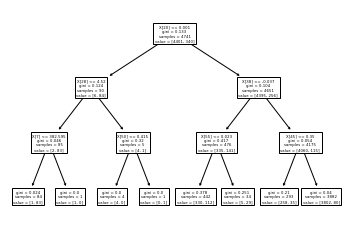

In [71]:
tree.plot_tree(results.fit(x_train, y_train)) 

In [72]:
y_train_predict = xtree.predict(x_train)

In [73]:
print ("Decision Tree Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

Decision Tree Train Accuracy: 0.951


In [74]:
y_test_predict = xtree.predict(x_test)

In [75]:
print ("Decision Tree Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

Decision Tree Test Accuracy: 0.953


# Random Forrest

In [76]:
from sklearn.ensemble import RandomForestClassifier

In [77]:
forest = RandomForestClassifier(criterion='gini', n_estimators = 25, random_state =1, n_jobs =2)

In [78]:
forest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25, n_jobs=2,
                       oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [79]:
y_train_predict = forest.predict(x_train)

In [80]:
print ("Random Forest Train Accuracy: %.3f" % accuracy_score(y_train,y_train_predict))

Random Forest Train Accuracy: 0.999


In [81]:
y_test_predict = forest.predict(x_test)

In [82]:
print ("Random Forest Test Accuracy: %.3f" % accuracy_score(y_test,y_test_predict))

Random Forest Test Accuracy: 0.951
